In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:07<00:00, 209MB/s]
100% 1.06G/1.06G [00:07<00:00, 144MB/s]


In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [14]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
train_ds = train_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_ds = validation_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [16]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds, batch_size=32)  # Adjust batch_size as needed

Epoch 1/10
625/625 [==============================] - 74s 102ms/step - loss: 1.3072 - accuracy: 0.5762 - val_loss: 1.2832 - val_accuracy: 0.5956
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.6149 - accuracy: 0.6661 - val_loss: 0.6008 - val_accuracy: 0.6562
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5229 - accuracy: 0.7329 - val_loss: 0.4988 - val_accuracy: 0.7630
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4513 - accuracy: 0.7829 - val_loss: 0.4862 - val_accuracy: 0.7822
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3984 - accuracy: 0.8138 - val_loss: 0.6421 - val_accuracy: 0.7254
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3407 - accuracy: 0.8421 - val_loss: 0.4264 - val_accuracy: 0.8228
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2835 - accuracy: 0.8730 - val_loss: 0.4774 - val_ac

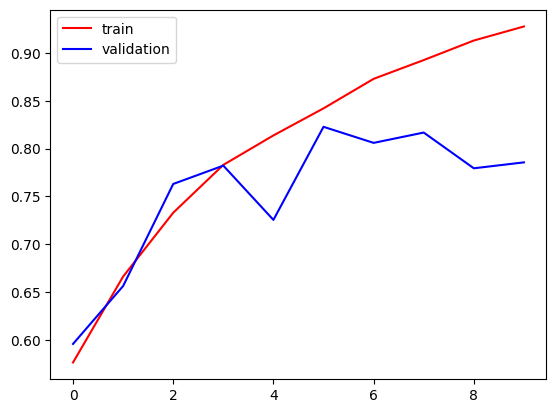

In [22]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

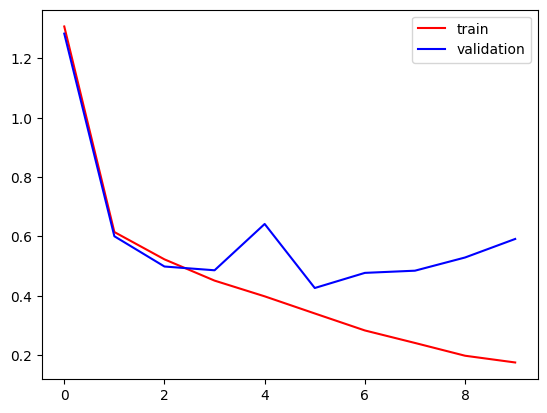

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [26]:
import cv2
!pip install requests
import requests
import numpy as np

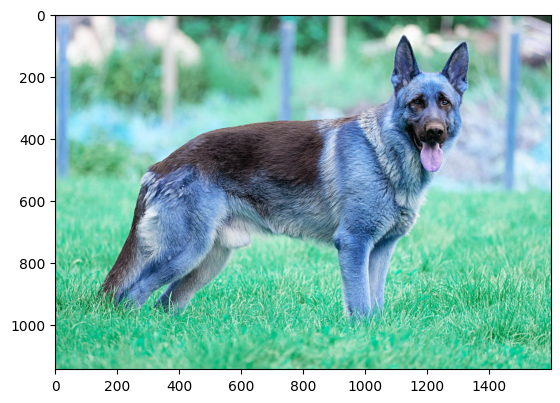

In [27]:
image_url = 'https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg'
response = requests.get(image_url)
image_data = response.content
test_img = cv2.imdecode(np.frombuffer(image_data, dtype=np.uint8), cv2.IMREAD_COLOR)
plt.imshow(test_img)

In [30]:
test_img.shape

(1144, 1600, 3)

In [31]:
test_img = cv2.resize(test_img,(256,256))

In [32]:
test_input = test_img.reshape((1,256,256,3))

In [36]:
if model.predict(test_input)[0][0]==1.0:
  print('dog')
else:
  print('cat')

1/1 [==============================] - 0s 18ms/step
dog
